## Análisis Exploratorio de Datos

Este trabajo tiene como objetivo analizar y comprender el comportamiento del sector de telecomunicaciones en Argentina a nivel nacional. El cliente, una empresa enfocada principalmente en la provisión de servicios de internet, busca aumentar el acceso a este servicio en todo el país. No obstante, para garantizar que se proporcionen datos pertinentes y útiles para la toma de decisiones estratégicas, es fundamental considerar también los demás servicios de comunicación en el análisis.

En el presente documento, se detalla paso por paso los procedimientos realizados para llevar adelante el análisis requerido, el que se vale fundamentalmente de los datos públicos ofrecidos por el Ente Nacional de Comunicaciones (ENACOM).

En el *procedimiento de ETL* se ha realizado la carga y corrección de datos, revisando los formatos, los valores nulos y valores faltantes. También se ha realizado una limpieza de cadenas de texto, corregido los formatos erróneos, y **manejado los valores duplicados** Además, se ha hecho una inspección preliminar, para determinar qué datos podían ser de interés para este informe.

En esta nueva instancia, se procederá a un análisis de las tablas seleccionadas por su relevancia, el cual pretende ser mucho más profundo que el primero. En él se intentará identificar patrones, outliers, comportamientos de los datos y su implicancia en el sector de telecomunicaciones en Argentina.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Accesos por Tecnología y por Localidad:
Comenzaremos por este dataset, que ofrece información sobre los accesos a distintas teconologías según las localidades.

In [4]:
df_accesos = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Accesos_tecnologia_localidad.csv')
df_accesos.head(3)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181


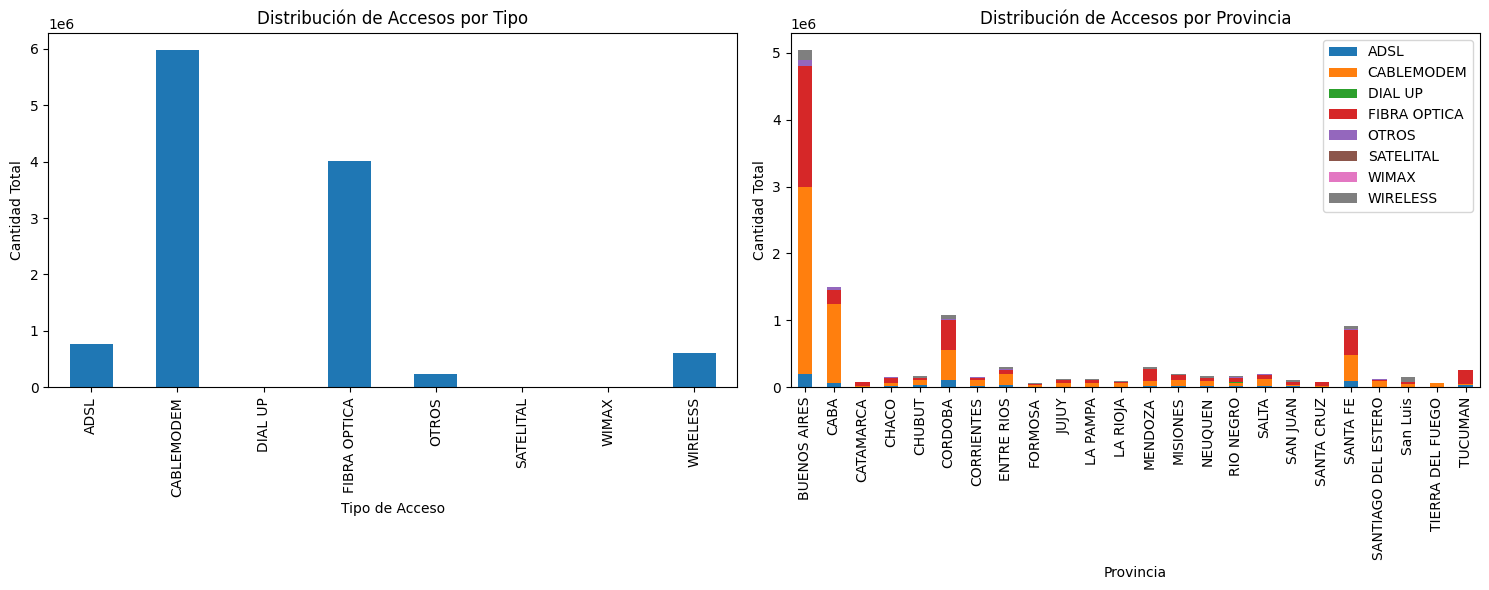

In [11]:
# Vamos a crear un gráfico combinado, para analizar en él la distribución de accesos por tipo, y por provincia.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#En el primer gráfico se puede ver cuáles son los tipos de tecnología con más accesos
df_accesos[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Distribución de Accesos por Tipo')
axs[0].set_ylabel('Cantidad Total')
axs[0].set_xlabel('Tipo de Acceso')

# El segundo gráfico, que es de barras apiladas, nos permitirá observar la distribución por provincias.
df_accesos.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Distribución de Accesos por Provincia')
axs[1].set_ylabel('Cantidad Total')
axs[1].set_xlabel('Provincia')

plt.tight_layout() #Ajustamos el espacio
plt.show()


Podemos observar en el gráfico de la izquierda, que prevalecen las tecnologías de Cablemodem y Fibra Óptica.
A la derecha, tenemos la distribución por Provincias, y en las barras apiladas cada tipo de conexión. Podemos observar que la Provincia de Buenos Aires cuenta con una enorme preponderancia en cuanto a la cantidad de conexiones por sobre el resto de las Provincias, seguida por la Ciudad Autónoma de Buenos Aires (CABA) y la Provincia de Córdoba.
Este dataset no nos permite hacer un análisis de la evolución en el tiempo de los parámetros observados.

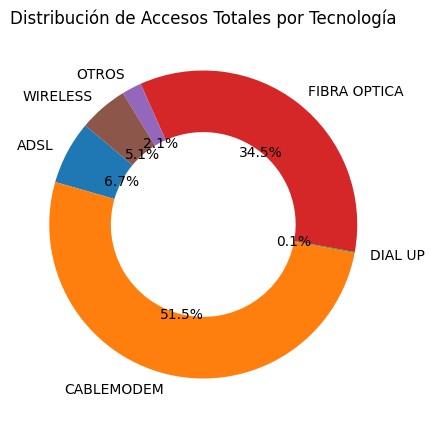

In [44]:
# Sumar los accesos por cada tecnología
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'WIRELESS']
total_tecnologias = df_accesos[tecnologias].sum()

# Si prefieres un gráfico de rosca, puedes usar:
plt.figure(figsize=(5,5))
plt.pie(total_tecnologias, labels=tecnologias, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Distribución de Accesos Totales por Tecnología')
plt.show()

En este gráfico podemos analizar la distribución de las distintas tecnologías disponibles en el mercado, confirmando la primacía de Cablemodem y la fibra óptica.

# Velocidad de Bajada

Podemos analizar ahora la evolución histórica de la velocidad de "bajada" o descarga (tasa a la cual los datos se transfieren desde un servidor en internet hacia un dispositivo). Se mide en Megabits por segundo.

In [13]:
df_vel_prov = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Velocidad % por prov.csv')
df_vel_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45


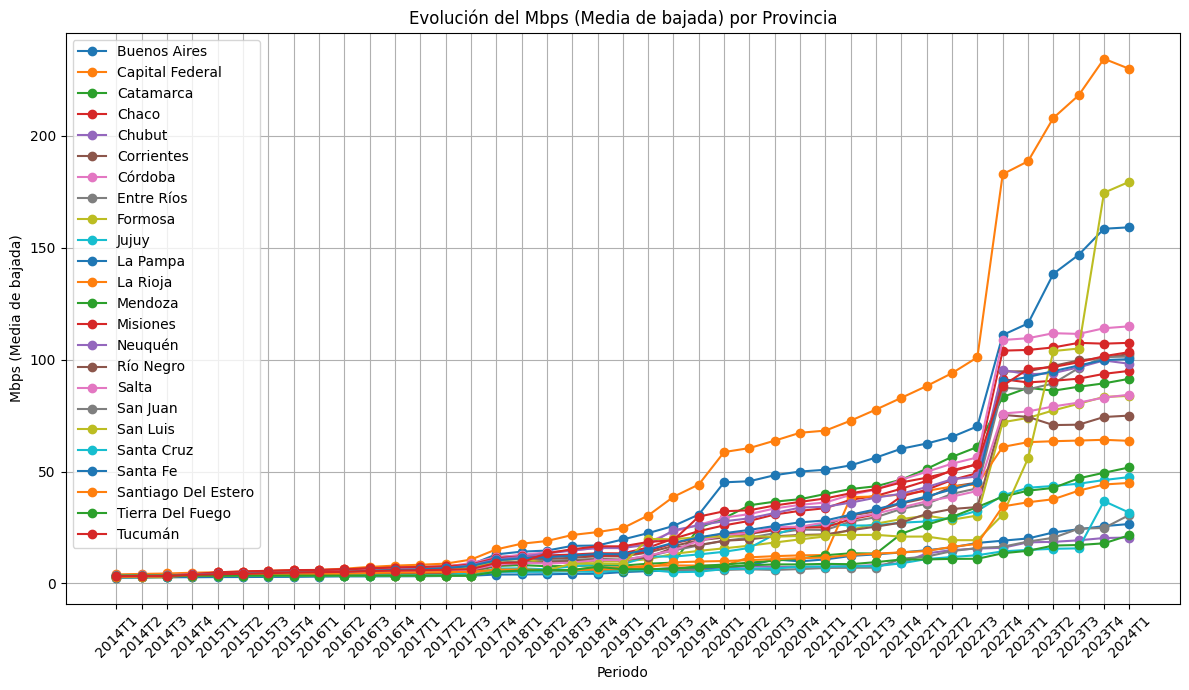

In [16]:
df_vel_prov['Periodo'] = df_vel_prov['Año'].astype(str) + 'T' + df_vel_prov['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico

df_pivot = df_vel_prov.pivot(index='Periodo', columns='Provincia', values='Mbps (Media de bajada)')

plt.figure(figsize=(12, 7))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

plt.title('Evolución del Mbps (Media de bajada) por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_vel_prov.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

En este primer análisis, sectorizado por Provincias, podemos ver que la velocidad media de descarga se destaca en la Ciudad Autónoma de Buenos Aires. Tiene mucho sentido: hablamos de una metrópolis, con gran densidad poblacional, en la que se suelen instalar grandes empresas multinacionales. En consecuencia, las inversiones en el rubro son mayores, aunque esto no es más que una especulación (en esta instancia) que podrá ser confirmada con mayores datos.
Lo que sí podemos concluir desde este primer grafo, es que en Provincias como Buenos Aires, de una enorme extensión territorial (y con menor densidad poblacional), se encuentran peor posicionadas en éstos términos.<br>
No obstante, se puede osbservar un enorme crecimiento en todas las provincias desde el 2017 a la actualidad, con un marcado ascenso a partir del año 2020, y un fuerte crecimiento desde la segunda mitad del año 2022.<br>
Para confimar estas tendencias, es procedente analizar la evolución total a nivel nacional.

In [19]:
df_vel_total = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Totales VMD.csv')
df_vel_total.head(1)

,Año,Trimestre,Mbps (Media de bajada)
0,2024,1,139.15


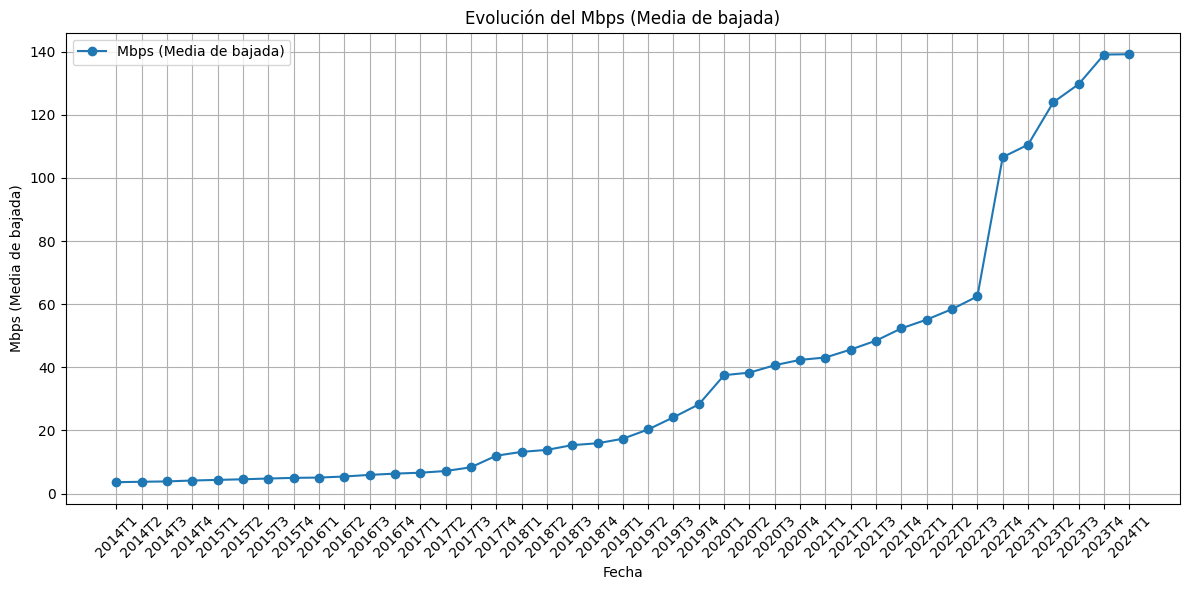

In [21]:
df_vel_total['Periodo'] = df_vel_total['Año'].astype(str) + 'T' + df_vel_total['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico
df_vel_total = df_vel_total.iloc[::-1] #invertimos el orden de los registros para acomodar el gráfico


plt.figure(figsize=(12, 6))
plt.plot(df_vel_total['Periodo'], df_vel_total['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución del Mbps (Media de bajada)')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_vel_total.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

Efectivamente, con esta nueva información podemos confirmar la tendencia a nivel nacional: el crecimiento de la velocidad de bajada es sostenido, casi sin la existencia de períodos en los que haya una baja en el promedio de velocidad de descarga. <br>
Luego, podemos observar períodos con una tendencia al crecimiento a mayor velocidad. Identificamos un primer pico en el primer trimestre del año 2020. Puede explicarse por motivos históricos: la pandemia global por Covid-19 trajo aparejado no sólo un mayor consumo, sino un despliegue de programas orientados al desarrollo de la conectividad, incentivos para el recambio y la actualización tecnológica; según informa el ENACOM en [este enlace](https://www.enacom.gob.ar/institucional/casi-un-millon-de-nuevas-familias-acceden-a-internet-con-una-velocidad-50--mas-rapida-que-al-inicio-de-la-pandemia_n3279).<br>
Este tipo de programas también explican un crecimiento excepcional de la velocidad durante el tercer trimestre del año 2022, lo que también surge a partir de la consolidación de trabajos remotos, lo que implicó mejorar las conexiones para poder desempeñarse. El trabajo remoto [se ha consolidado exitosamente en Argentina](https://utopiaurbana.city/2023/11/22/el-regreso-a-la-oficina-o-la-consolidacion-del-trabajo-remoto/#:~:text=En%20Argentina%20el%20fen%C3%B3meno%20tambi%C3%A9n,trabajo%20remoto%20durante%20la%20pandemia.).

Es interesante analizar las diferentes tecnologías utilizadas en el país (vistas en el primer punto del presente análisis), extendida a lo largo del tiempo.

# Accesos Totales por Tecnología

In [22]:
df_tec_total = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Totales Accesos Por Tecnología.csv')
df_tec_total.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2024,1,774475,5986957,4015101,598682,257941
1,2023,4,836390,6022532,3908183,585760,194796
2,2023,3,897895,6018832,3708718,581436,200027


Analizaremos la injerencia de la tecnología en la velocidad de descarga observada en los puntos previos.

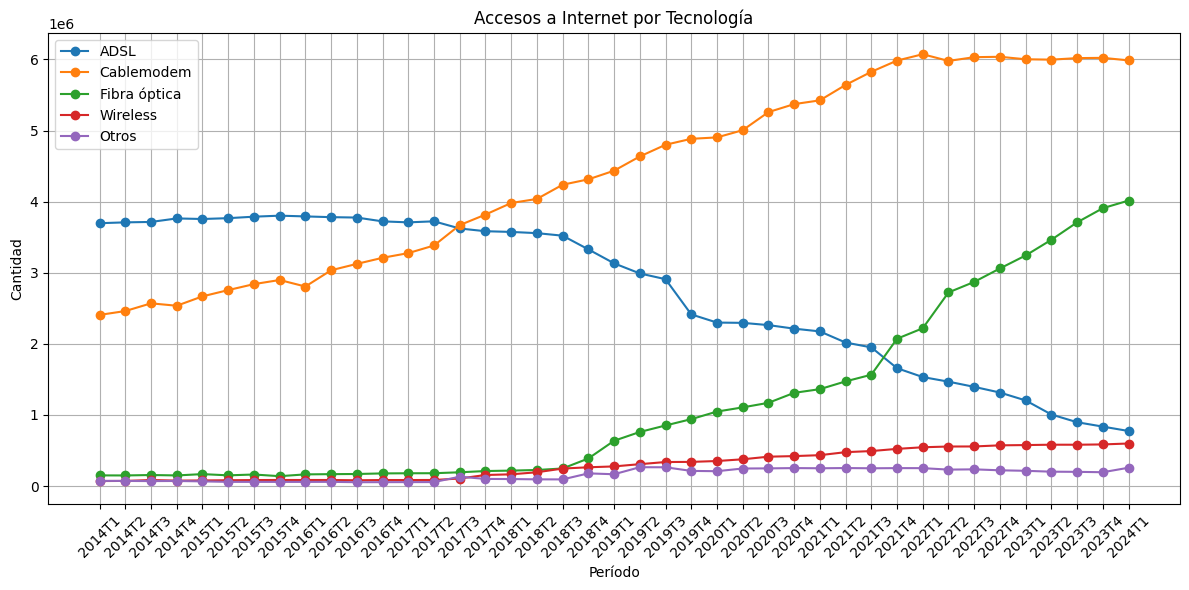

In [23]:
df_tec_total['Periodo'] = df_tec_total['Año'].astype(str) + 'T' + df_tec_total['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico
df_tec_total = df_tec_total.iloc[::-1]

columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

plt.figure(figsize=(12, 6))

for columna in columnas_grafico:
    plt.plot(df_tec_total['Periodo'], df_tec_total[columna], marker='o', label=columna)

plt.title('Accesos a Internet por Tecnología')
plt.xlabel('Período')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_tec_total.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

La medición de las tecnologías utilizadas durante la última década, nos permiten sacar algunas conclusiones asociadas  a la velocidad de descarga.<br>
En primer lugar, hemos de decir que las conexiones de banda ancha a través de líneas telefónicas de cobre convencionales (ADSL o Asymmetric Digital Subscriber Line) ha disminuido considerablemente. Encuentra su principal explicación en su reemplazo por Cablemodem, que es mucho más confiable por utilizar cable coaxial (el mismo que el utilizado para la televisión por cable), además de ser más económico. Pueden analizarse mejor sus diferencias [aquí](https://www.highspeedinternet.com/es/recursos/dsl-vs-cable-cual-internet-es-mejor).<br>
Pero también observamos un aumento en las conexiones por fibra óptica. En los últimos 4 años se observa un crecimiento exponencial, respecto a los valores del primer trimestre del año 2019. Podemos confirmarlo con los propios [informes de la ENACOM](https://www.ambito.com/economia/fuerte-crecimiento-acceso-la-fibra-optica-la-argentina-los-ultimos-cuatro-anos-n5766791).<br>
Estas tendencias dan cuenta de que carece de sentido realizar un análisis histórico tan abierto, ya que la tecnología ha cambiado considerablemente. Parece pertinente limitar los análisis a lo ocurrido desde el año 2019 en adelante.<br><br>
Dicho ello, podemos realizar algunas apreciaciones cuantitativas y cualitativas de relevancia:<br>
- Los accesos ADSL se han reducido considerablemente.
- Ha aumentado el número de accesos Cablemodem, posicionándose como la más utilizada; aunque notamos un estancamiento desde el año 2022.
- Las conexiones de Fibra Óptica han aumentado sostenidamente desde 2018.
- En 2021 se profundizó la tendencia a la alza de los accesos a Fibra Óptica.
- Las tecnologías Wireless y otras no tienen grandes variaciones desde el inicio del análisis.

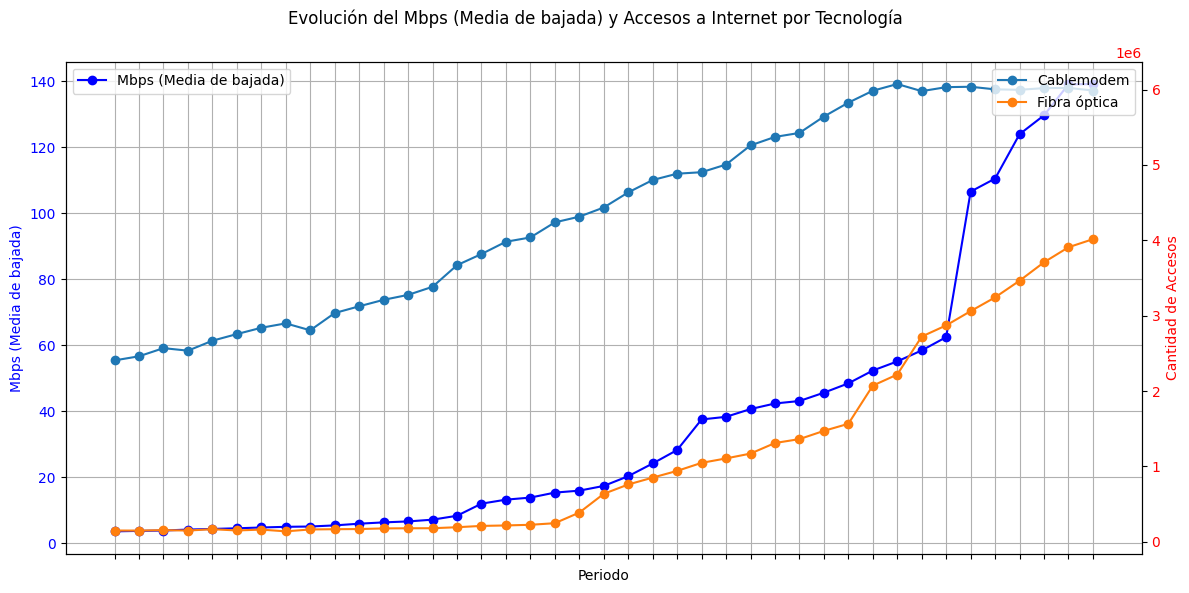

In [46]:
#Haremos un gráfico para comprender la relación entre las dos tecnologías principales, y la velocidad de descarga.
df_vel_total['Periodo'] = df_vel_total['Año'].astype(str) + 'T' + df_vel_total['Trimestre'].astype(str)
df_vel_total = df_vel_total.iloc[::-1]
df_tec_total['Periodo'] = df_tec_total['Año'].astype(str) + 'T' + df_tec_total['Trimestre'].astype(str)

columnas_grafico = ['Cablemodem', 'Fibra óptica']
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico 1 - Mbps (Media de bajada)
ax1.plot(df_vel_total['Periodo'], df_vel_total['Mbps (Media de bajada)'], marker='o', color='b', label='Mbps (Media de bajada)')
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Mbps (Media de bajada)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()

# Gráfico 2 - Accesos a Internet por Tecnología
for columna in columnas_grafico:
    ax2.plot(df_tec_total['Periodo'], df_tec_total[columna], marker='o', label=columna)

ax2.set_ylabel('Cantidad de Accesos', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Ocultar las etiquetas del eje X
ax1.set_xticklabels([])
ax2.set_xticklabels([])

fig.suptitle('Evolución del Mbps (Media de bajada) y Accesos a Internet por Tecnología')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Eliminamos las columnas 'Periodo' que fueron creadas para estos gráficos
df_vel_total.drop(columns='Periodo', inplace=True)
df_tec_total.drop(columns='Periodo', inplace=True)


La curva azul oscura representa el promedio de velocidad de bajada. <br>
Las otras curvas representan las tecnologías predominantes. <br>
Si bien el eje Y nos muestra escalas diferentes, el gráfico nos permite comprender que el aumento de la velocidad de descarga se encuentra claramente asociado al cambio de tecnología. De hecho, podemos ver la clara relación con el aumento de accesos en ambas tecnologías, posicionándose entre ellas.

# Dial - BAf

Otro de los puntos de relevancia para el análisis de la evolución del sector de Telecomunicaciones es la medición del Dial-up y la Banda Ancha Fija. <br>
Dial-up es una tecnología de acceso a Internet que utiliza una línea telefónica convencional para establecer una conexión. Actualmente, ha sido reemplazada por tecnologías más rápidas. Es económica y tiene mayor disponibilidad en áreas remotas, pero la conexión puede ser inestable y lenta.<br>
Banda ancha fija se refiere a tecnologías de acceso a Internet que proporcionan altas velocidades de transmisión de datos a través de conexiones cableadas, como DSL, cable, fibra óptica, etc. Ofrece velocidades más elevadas, uso constante, entre otras cualidades.


In [47]:
df_dial_baf = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Dial-BAf.csv')
df_dial_baf.head(3)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
0,2024,1,Buenos Aires,5038657,5900.0
1,2024,1,Capital Federal,1502661,2050.0
2,2024,1,Catamarca,74932,1.0


Este dataset tiene un total de las conexiones a Banda ancha fija y Dial-up, segmentadas por trimestre y por Provincia. Haremos un promedio para mostrar su evolución.

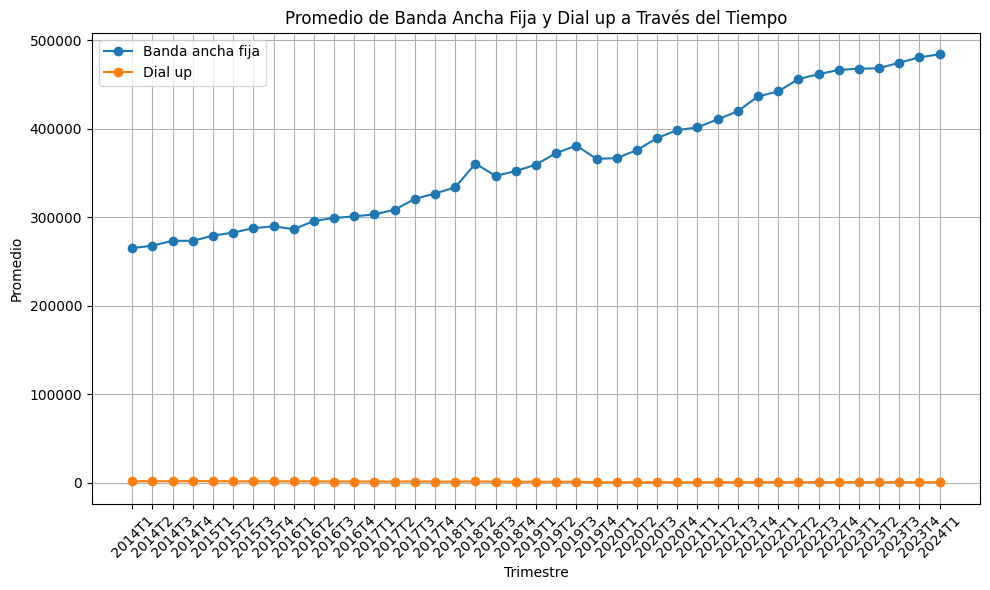

In [50]:
df_promedio = df_dial_baf.groupby(['Año', 'Trimestre']).agg({
    'Banda ancha fija': 'mean',
    'Dial up': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_promedio['Año'].astype(str) + 'T' + df_promedio['Trimestre'].astype(str), df_promedio['Banda ancha fija'], marker='o', label='Banda ancha fija')
plt.plot(df_promedio['Año'].astype(str) + 'T' + df_promedio['Trimestre'].astype(str), df_promedio['Dial up'], marker='o', label='Dial up')

plt.title('Promedio de Banda Ancha Fija y Dial up a Través del Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Este gráfico resalta la transición tecnológica en el acceso a internet, mostrando el declive del Dial Up y la adopción masiva de la Banda Ancha Fija como principal forma de conectividad en las diferentes provincias analizadas.
Podemos sacar como conclusiones que la banda ancha mantuvo un crecimiento estable, con algunas bajas que tendieron a recuperación.<br>
Actualmente, podemos concluir que la cantidad de conexiones Dial-up es absolutamente exigua en comparación con las conexiones de Banda ancha.

# Penetración en hogares
La penetración de internet permite comprender mejor el impacto que tiene este medio de comunicación en la sociedad. Posibilita el control de zonas con mayor infraestructura, pero también resulta ser una buena referencia de demanda y acceso.

In [51]:
df_penet_hogares = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Penetracion hogares.csv')
df_penet_hogares.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82


Es posible analizar la penetración por Provincia y por período.

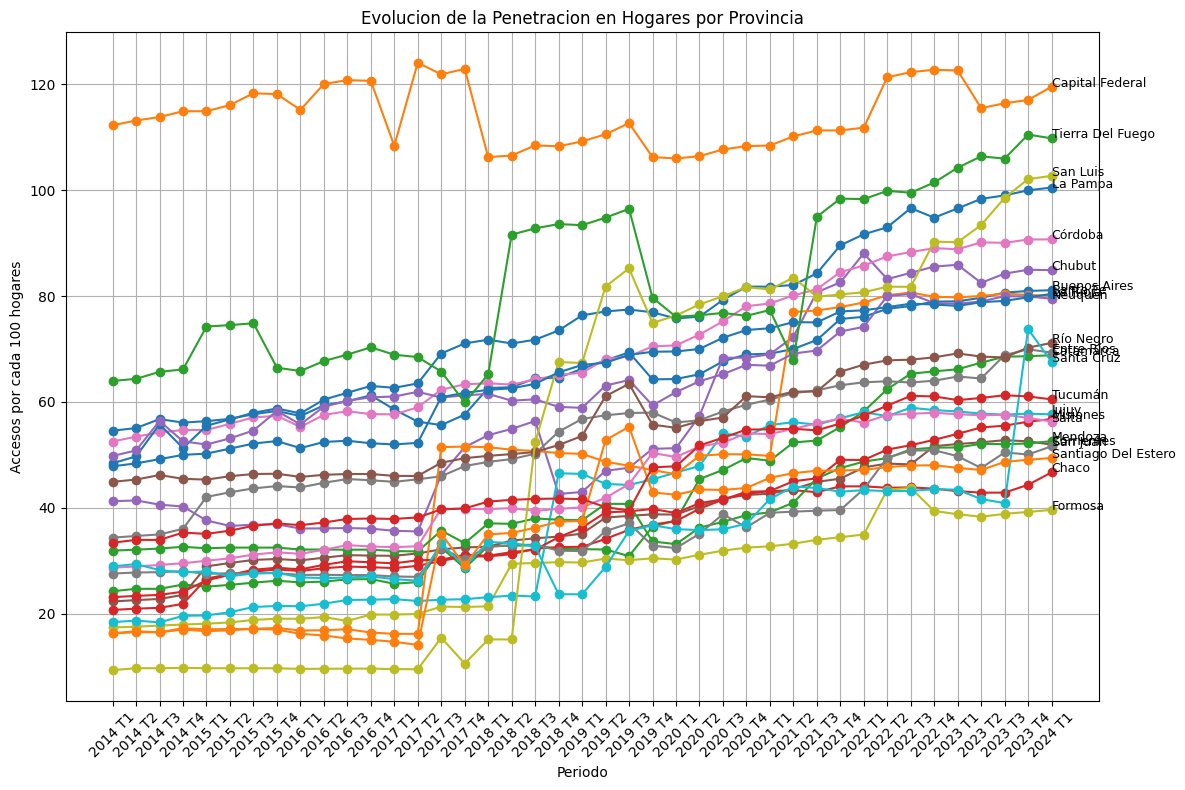

In [52]:
df_penet_hogares['Periodo'] = df_penet_hogares['Año'].astype(str) + ' T' + df_penet_hogares['Trimestre'].astype(str)

df_pivot = df_penet_hogares.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hogares')
df_penet_hogares.drop(columns=['Periodo'], inplace=True)

plt.figure(figsize=(12, 8))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
    
    plt.annotate(provincia, xy=(df_pivot.index[-1], df_pivot[provincia].iloc[-1]), xytext=(0, 0),
                textcoords='offset points', fontsize=9, color='black')

plt.title('Evolucion de la Penetracion en Hogares por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis por Provincia es engorroso, y su ilustración gráfica muy dificultosa.
Ello no quita que, a partir de aquí, podamos observar que la mayor penetración en hogares se observa en la Ciudad Autónoma de Buenos Aires y en Tierra del Fuego.
Se destaca el credimiento de San Luis, que se encontraba como la provincia con menor penetración por hogar, y se ha posicionado tercera.

In [58]:
#Haremos un filtro del último período, para poder analizar el ranking de las provincias con mayor penetración.
ultimo_periodo_2024 = df_penet_hogares[(df_penet_hogares['Año'] == 2024)]
ranking_provincias_2024 = ultimo_periodo_2024.sort_values(by='Accesos por cada 100 hogares', ascending=False)
ranking_provincias_2024[['Provincia', 'Accesos por cada 100 hogares']].head(5)


,Provincia,Accesos por cada 100 hogares
1,Capital Federal,119.53
22,Tierra Del Fuego,109.78
18,San Luis,102.70
10,La Pampa,100.49
5,Córdoba,90.70


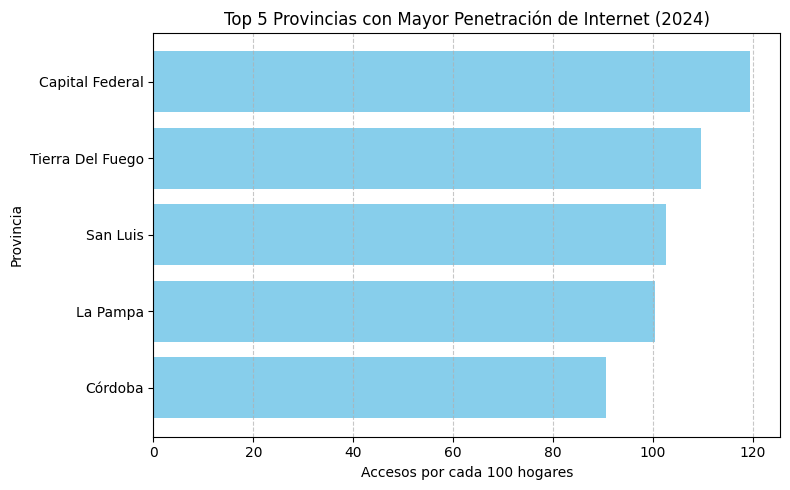

In [60]:
top_5_provincias = ranking_provincias_2024[['Provincia', 'Accesos por cada 100 hogares']].head(5)

#Graficaremos el top 5 de Provincias con mayor penetración
plt.figure(figsize=(8, 5))
plt.barh(top_5_provincias['Provincia'], top_5_provincias['Accesos por cada 100 hogares'], color='skyblue')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.title('Top 5 Provincias con Mayor Penetración de Internet (2024)')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la provincia con mayor penetración esté en la parte superior
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El dato es curioso, pero completamente lógico: Las primeras cuatro provincias tienen más de 100 accesos cada 100 hogares. Ello podría responder a la densidad poblacional, a las crecientes inversiones en esos sectores, y al desarrollo de diversos sectores que requieren mayor conectividad para funcionar.

# Penetración en la Población
A diferencia de la penetración en hogares, aquí se mide el porcentaje o cantidad de personas que tienen acceso.

In [61]:
df_penet_poblacion = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Penetración población.csv')
df_penet_poblacion.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50


In [64]:
#Haremos un filtro del último período, para poder analizar el ranking de las provincias con mayor penetración.
poblacion_2024 = df_penet_poblacion[(df_penet_poblacion['Año'] == 2024)]
ranking_2024 = poblacion_2024.sort_values(by='Accesos por cada 100 hab', ascending=False)
ranking_2024[['Provincia', 'Accesos por cada 100 hab']].head(5)

,Provincia,Accesos por cada 100 hab
1,Capital Federal,48.78
10,La Pampa,33.11
22,Tierra Del Fuego,32.54
18,San Luis,29.39
0,Buenos Aires,27.80


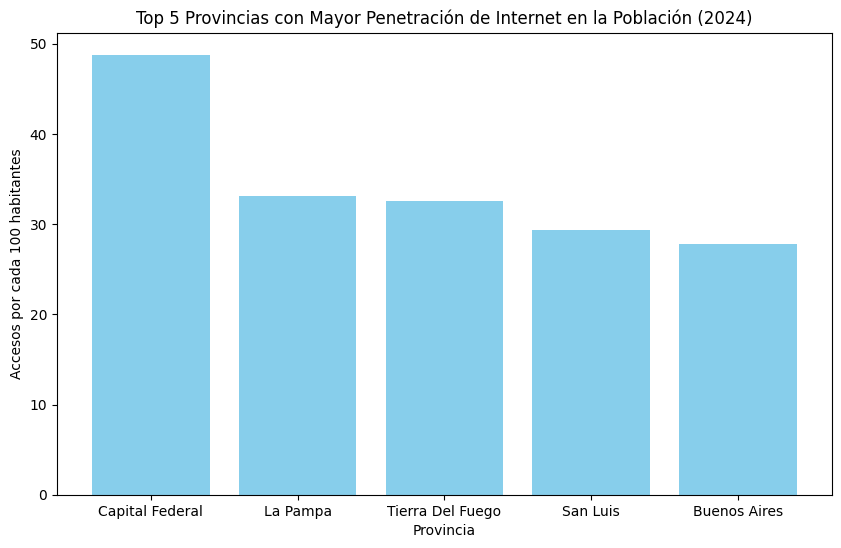

In [65]:
# Indicamos el top 5
top_5_provincias = ranking_2024.head(5)
#Utilizaremos nuevamente un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_provincias['Provincia'], top_5_provincias['Accesos por cada 100 hab'], color='skyblue')
plt.title('Top 5 Provincias con Mayor Penetración de Internet en la Población (2024)')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 habitantes')
plt.show()


Continúa prevaleciendo la Capital Federal (Ciudad Autónoma de Buenos Aires) con la mayor penetración a la población. En este ranking, Buenos Aires tiene mayor penetración que la Provincia de Córdoba, que permanece en el quinto puesto de provincias con más penetración por hogar.<br>
La Pampa y Tierra del Fuego continúan altamente posicionados. Por su parte, el ascenso de la Provincia de San Luis también se ve reflejado en la penetración por persona.<br>
A diferencia de la penetración por hogar, aquí se observan valores que alcanzan cerca del 50% (En la Ciudad Autónoma de Buenos Aires), y luego un aproximado de 33 accesos cada 100 habitantes. No hay una penetración a nivel población tan alta (lo que tiene sentido, considerando que en un hogar suelen habitar varias personas).


# Penetración total


In [66]:
df_penet_total = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Penetracion total.csv')
df_penet_total.head(3)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
